In [190]:
import os
current_directory = os.getcwd()
print(current_directory)

/Users/masudur/Downloads/JPSM analysis


## Load data

In [191]:
import pandas as pd

### MOST DOWNLOADED

In [288]:
data_loaded = pd.read_excel('JPSM top-downloaded-cited.xlsx', sheet_name='MOST DOWNLOADED')
data_loaded.head(2)

,issn,journal,pii,doi,title,authors,volume,volume title,issue,supplement,article type,online date,cover date,full article views/ downloads
0,0885-3924,Journal of Pain and Symptom Management,S088539241000391X,10.1016/j.jpainsymman.2010.01.021,Symptoms in the Month Before Death for Stage 5...,"Murtagh, F.; Addington-Hall, J.; Edmonds, P.; ...",40,NaN,3,NaN,Full-length article,2010-07-01,2010-09-01,145346
1,0885-3924,Journal of Pain and Symptom Management,S0885392411000145,10.1016/j.jpainsymman.2010.08.016,"Studies Comparing Numerical Rating Scales, Ver...","Hjermstad, M.; Fayers, P.; Haugen, D.; Caracen...",41,NaN,6,NaN,Review article,2011-05-27,2011-06-01,143923


In [193]:
#data_loaded.describe()

In [194]:
byYear = data_loaded.groupby(data_loaded['online date'].dt.year).size()
#byYear

In [195]:
# 2009-2016 and 2017-2024
bins = [2008, 2016, 2024]  
labels = ['2009-2016', '2017-2024']
quarter_counts = data_loaded.groupby(
    pd.cut(data_loaded['online date'].dt.year, bins=bins, labels=labels)
).size()
#quarter_counts

/var/folders/ty/p92rm4px5vdbjllzhvcxgnb80000gn/T/ipykernel_1097/3168435432.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quarter_counts = data_loaded.groupby(


### MOST CITED

In [289]:
data_cited = pd.read_excel('JPSM top-downloaded-cited.xlsx', sheet_name='MOST CITED')
data_cited.head(2)

,Source title,Year,Title,PDF link,Authors,Volume,Issue,Art. No.,Page start,Page end,Page count,Lifetime Citations,DOI,Link,Document Type,Publication Stage,Open Access,Source,EID
0,Journal of Pain and Symptom Management,2011,"Studies comparing numerical rating scales, ver...",https://www.jpsmjournal.com/action/showPdf?pii...,Hjermstad M.J.; Fayers P.M.; Haugen D.F.; Cara...,41,6,NaN,1073,1093,20.0,1994,10.1016/j.jpainsymman.2010.08.016,https://www.scopus.com/inward/record.uri?eid=2...,Review,Final,All Open Access; Green Open Access,Scopus,2-s2.0-79957652902
1,Journal of Pain and Symptom Management,2016,Update on Prevalence of Pain in Patients with ...,NaN,Van Den Beuken-Van Everdingen M.H.J.; Hochsten...,51,6,NaN,1070,1090000000000,NaN,1226,10.1016/j.jpainsymman.2015.12.340,https://www.scopus.com/inward/record.uri?eid=2...,Review,Final,NaN,Scopus,2-s2.0-84973102519


In [197]:
#data_cited.describe()

In [198]:
byYear1 = data_cited.groupby('Year').size()
#byYear1

In [199]:
# 2009-2016 and 2017-2024
bins = [2008, 2016, 2024]  
labels = ['2009-2016', '2017-2024']
quarter_counts = data_loaded.groupby(
    pd.cut(data_cited['Year'], bins=bins, labels=labels)
).size()
#quarter_counts

/var/folders/ty/p92rm4px5vdbjllzhvcxgnb80000gn/T/ipykernel_1097/83708003.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quarter_counts = data_loaded.groupby(


## Single PDF analysis

In [200]:
!pip install PyMuPDF -q

In [201]:
import pymupdf

pdf_path = "paper_cited/PIIS088539240900743X.pdf"

try:
    doc = pymupdf.open(pdf_path)
    page = doc[0]
    extracted_text = page.get_text(sort=True)
    #print(extracted_text)
except FileNotFoundError:
    print(f"Error: PDF file not found at {pdf_path}")
except Exception as e:
    print(f"An error occurred: {e}")
finally:
    if 'doc' in locals() and doc:
        doc.close()

In [202]:
def full_paper(text, start_keyword, end_keyword):
    start_index = text.find(start_keyword)
    if start_index == -1:
        return ""
    content_start_index = start_index + len(start_keyword)
    end_index = text.find(end_keyword, content_start_index)
    if end_index == -1:
        return text[content_start_index:] 
    return text[content_start_index:end_index]

In [223]:
#!pip install fuzzywuzzy 
import pandas as pd
from fuzzywuzzy import fuzz

def title_match(text):
    titles = pd.DataFrame(data['Title'])
    for i, title_row in titles.iterrows():
        title = title_row['Title']
        best_match = None
        best_score = 0
        best_text = None
        score = fuzz.partial_ratio(title.lower(), text.lower())
        if score > best_score:
            best_score = score
        if best_score > 95:
            return title

In [203]:
def abstract_(text, start_keyword='Abstract', end_keyword='Key Words'):
    start_index = text.find(start_keyword)
    if start_index == -1:
        return ""
    content_start_index = start_index + len(start_keyword)
    end_index = text.find(end_keyword, content_start_index)
    if end_index == -1:
        return text[content_start_index:] 
    return text[content_start_index:end_index]

In [255]:
def extract_keywords(text, keyword="Key Words"):
    lines = text.split('\n')
    for i, line in enumerate(lines):
        if keyword in line:
            if i + 1 < len(lines):
                next_line = lines[i + 1].strip()
                return next_line
            else:
                return ""
    return ""

In [257]:
#!pip install sumy

In [258]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer
import nltk
nltk.download('punkt_tab')
import fitz

paper_path = "paper_cited/PIIS0885392417303330.pdf"
all_text = ""
try:
    doc = fitz.open(paper_path)
    for page in doc:
        all_text += page.get_text() + chr(12)
    #chr(12).join([page.get_text() for page in doc])
    #print(all_text)

    only_abstract = abstract_(all_text,'Abstract','J Pain Symptom Manage')
    #print(only_abstract)
    
    only_paper = full_paper(all_text,'Introduction','References')
    #print(only_paper)

    #parser = PlaintextParser.from_string(only_paper, Tokenizer("english"))
    #summarizer = LsaSummarizer()
    #summary = summarizer(parser.document, 50)  #2 sentences summary
    #for sentence in summary:
    #    print(sentence)
    
except FileNotFoundError:
    print(f"Error: PDF file not found at {paper_path}")
except Exception as e:
    print(f"An error occurred: {e}")
finally:
    if 'doc' in locals() and doc:
        doc.close()

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/masudur/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [259]:
keywords = extract_keywords(all_text)
keywords

'End of life, dementia, Alzheimer’s disease, cognitive impairments, advance care planning, palliative care'

## Data Split


In [297]:
period1 = data_cited[(data_cited['Year'] >= 2009) & (data_cited['Year'] <= 2016)][['Year', 'Title']]
period2 = data_cited[(data_cited['Year'] >= 2017) & (data_cited['Year'] <= 2024)][['Year', 'Title']]
period3 = data_loaded[(data_loaded['online date'].dt.year >= 2009) & (data_loaded['online date'].dt.year <= 2016)][['online date', 'title ']]
period4 = data_loaded[(data_loaded['online date'].dt.year >= 2017) & (data_loaded['online date'].dt.year <= 2024)][['online date', 'title ']]

In [299]:
period4.head(5)

,online date,title
2,2018-09-10,Drugs Used for Euthanasia: A Repeated Populati...
3,2020-05-06,Redefining Palliative Care—A New Consensus-Bas...
10,2020-04-13,Grief During the COVID-19 Pandemic: Considerat...
11,2018-01-31,"Culture and Palliative Care: Preferences, Comm..."
13,2018-12-20,Safe and Appropriate Use of Methadone in Hospi...


In [279]:
print("Period 1 (2009-2016):", len(period1), "papers")
print("Period 2 (2017-2024):", len(period2), "papers")

Period 1 (2009-2016): 156 papers
Period 2 (2017-2024): 44 papers


In [280]:
len(period1['Title'])

156

In [282]:
#df_titles = period1[['Title']]
df_titles = period1
df_titles.head(5)

,Year,Title
0,2011,"Studies comparing numerical rating scales, ver..."
1,2016,Update on Prevalence of Pain in Patients with ...
5,2010,"Multicenter, Double-Blind, Randomized, Placebo..."
8,2010,Estimate of current hospice and palliative med...
9,2013,Mapping levels of palliative care development:...


## Full text extraction

In [283]:
def extract_all_text(pdf_path):
    doc = fitz.open(pdf_path)
    full_text = ""
    for page_num in range(len(doc)):
        page = doc.load_page(page_num)
        full_text += page.get_text("text")
    doc.close()
    return full_text

In [284]:
# This function may take 3-5 minutes to run
import os
import fitz  #PyMuPDF
import pandas as pd

def extract_texts_from_folder(folder_path):
    data = []
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(".pdf"):
            file_path = os.path.join(folder_path, filename)
            try:
                full_text = extract_all_text(file_path)
                title = title_match(full_text)
                keywords = extract_keywords(full_text, keyword="Key Words")
                abs_ = abstract_(full_text,'Abstract','J Pain Symptom Manage')
                paper_ = full_paper(full_text,'Introduction','References')
                data.append({"filename": filename, "title": title, "abstract": abs_, "full_text": paper_})
            except Exception as e:
                print(f"Error reading {filename}: {e}")
    return pd.DataFrame(data)

folder_path = "paper_cited/"
df_texts = extract_texts_from_folder(folder_path)

#print(df_texts.head(5))

In [300]:
len(df_texts)

200

In [302]:
#df_texts.loc[67]['full_text']

In [303]:
#print(df_texts.columns)

In [304]:
#print(df_titles.columns)

In [305]:
len(df_texts)

200

In [306]:
len(df_titles)

156

## Preprocessing

In [309]:
import re

def clean_text(text):
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = text.replace('\n', ' ')
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df_texts['full_text'] = df_texts['full_text'].apply(clean_text)
df_texts['abstract'] = df_texts['abstract'].apply(clean_text)

df_texts.to_csv("all_cited_texts.csv", index=False)
df_texts

,filename,title,abstract,full_text
0,PIIS0885392415000731.pdf,Measuring what matters: Top-ranked quality ind...,Context. Measuring quality of hospice and pall...,Far too many patients and families in the U.S....
1,PIIS0885392411004088.pdf,Self-compassion in patients with persistent mu...,Context. Self-compassion entails qualities suc...,"Over the past 30 years, numerous studies have ..."
2,PIIS0885392413001206.pdf,Breakthrough cancer pain: An observational stu...,Context. Breakthrough pain is common in patien...,Pain is a common symptom in patients with canc...
3,PIIS0885392411004507.pdf,None,Context. HIV infection has become a manageable...,Before combination antiretroviral therapy (ART...
4,PIIS0885392411000601.pdf,Patient-reported pressure ulcer pain: A mixed-...,Context. Pressure ulcers (PUs) can cause patie...,Pressure ulcers (PUs) are painful wounds of th...
...,...,...,...,...
195,PIIS0885392414004667.pdf,Symptom Expression in the Last Seven Days of L...,Context. The symptom burden in the last week o...,Acute palliative care units (APCUs) are specia...
196,PIIS0885392409008422.pdf,None,Context. Hemodialysis patients suffer a large ...,The number of patients undergoing hemodial- ys...
197,PIIS0885392408003886.pdf,The Association of Physical and Psychological ...,Previous studies have reported on the symptom ...,Cancer patients who are approaching the end of...
198,PIIS0885392420301706.pdf,None,"Within weeks, COVID-19 has transformed our pra...",


In [310]:
df_texts

,filename,title,abstract,full_text
0,PIIS0885392415000731.pdf,Measuring what matters: Top-ranked quality ind...,Context. Measuring quality of hospice and pall...,Far too many patients and families in the U.S....
1,PIIS0885392411004088.pdf,Self-compassion in patients with persistent mu...,Context. Self-compassion entails qualities suc...,"Over the past 30 years, numerous studies have ..."
2,PIIS0885392413001206.pdf,Breakthrough cancer pain: An observational stu...,Context. Breakthrough pain is common in patien...,Pain is a common symptom in patients with canc...
3,PIIS0885392411004507.pdf,None,Context. HIV infection has become a manageable...,Before combination antiretroviral therapy (ART...
4,PIIS0885392411000601.pdf,Patient-reported pressure ulcer pain: A mixed-...,Context. Pressure ulcers (PUs) can cause patie...,Pressure ulcers (PUs) are painful wounds of th...
...,...,...,...,...
195,PIIS0885392414004667.pdf,Symptom Expression in the Last Seven Days of L...,Context. The symptom burden in the last week o...,Acute palliative care units (APCUs) are specia...
196,PIIS0885392409008422.pdf,None,Context. Hemodialysis patients suffer a large ...,The number of patients undergoing hemodial- ys...
197,PIIS0885392408003886.pdf,The Association of Physical and Psychological ...,Previous studies have reported on the symptom ...,Cancer patients who are approaching the end of...
198,PIIS0885392420301706.pdf,None,"Within weeks, COVID-19 has transformed our pra...",


In [313]:
df_texts.to_csv("full_text_cited.csv")

In [314]:
df_texts['full_text']

0      Far too many patients and families in the U.S....
1      Over the past 30 years, numerous studies have ...
2      Pain is a common symptom in patients with canc...
3      Before combination antiretroviral therapy (ART...
4      Pressure ulcers (PUs) are painful wounds of th...
                             ...                        
195    Acute palliative care units (APCUs) are specia...
196    The number of patients undergoing hemodial- ys...
197    Cancer patients who are approaching the end of...
198                                                     
199    Recent advances in cognitive-behavioral pain t...
Name: full_text, Length: 200, dtype: object

In [315]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/masudur/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/masudur/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [316]:
#!pip install spacy

In [317]:
#!pip install nltk -q

In [318]:
import nltk
import spacy
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess

In [342]:
to_remove = {
    'age', 'also', 'article', \
    'background', 'base', 'better', \
    'care', 'common', 'compare', 'conclusion', 'control', 'cope', 'correlate', \
    'data', 'datum', 'day', 'different', 'disorder', 'early', 'examine', 'fact', 'factor', 'female', 'four', \
    'gain', 'gender', 'group', 'great', 'health', 'high', 'hospice', \
    'identify', 'include', 'increase', 'introduction', 'issue', 'item', \
    'last', 'late', 'less', 'level', 'life', 'likely', 'low', 'lower', \
    'make', 'male', 'man', 'material', 'may', 'measure', 'method', 'methods', 'month', 'need', \
    'nine', 'one', 'Original', 'outcome', 'patient', 'patients', 'program', 'provide', \
    'rate', 'receive', 'related', 'relate', 'report', 'research', 'result', 'results', 'review', 'role', 'rslp', \
    'score', 'scores', 'see', 'self', 'service', 'set', 'sex', 'seven', 'significant', 'similar', 'six', 'study', 'studies', \
    'ten', 'tens', 'test', 'three', 'time', 'treatment', 'trial', 'two', 'use', 'vol', 'well', 'woman', 'year'
}
#to_removed

In [343]:
def preprocess(doc):
    tokens = doc.lower().translate(str.maketrans('', '', string.punctuation)).split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 3]
    return tokens

In [344]:
filter1 = lambda w: w[0].isalpha() and (w.lower() not in stop_words | to_remove) and (len(w) > 2)

text = df_texts['full_text'].iloc[0]
#text = matched_df['title'].iloc[0]

sent = [word for word in simple_preprocess(str(text)) if filter1(word)]
#sent

In [345]:
str(sent)

"['far', 'many', 'families', 'expe', 'rience', 'unnecessary', 'physical', 'emotional', 'suffering', 'serious', 'threatening', 'illnesses', 'recent', 'demonstrated', 'gaps', 'quality', 'domains', 'pain', 'symptom', 'management', 'communication', 'planning', 'across', 'settings', 'hospitals', 'nursing', 'homes', 'ambulatory', 'palliative', 'deﬁned', 'provides', 'relief', 'symptoms', 'supports', 'quality', 'serious', 'advanced', 'illness', 'fam', 'ilies', 'approach', 'focused', 'tients', 'limited', 'expectancy', 'families', 'accumulating', 'demonstrates', 'interventions', 'ambulatory', 'palliative', 'clinics', 'structured', 'goals', 'discussions', 'critical', 'outpatient', 'nurse', 'led', 'interventions', 'targeting', 'family', 'pain', 'management', 'improve', 'comes', 'family', 'satisfaction', 'utilization', 'measuring', 'quality', 'delivery', 'integral', 'palliative', 'programs', 'speciﬁed', 'national', 'consensus', 'project', 'ncp', 'clinical', 'prac', 'tice', 'guidelines', 'joint', 'c

### Word cloud

In [346]:
#!pip install wordcloud

In [347]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

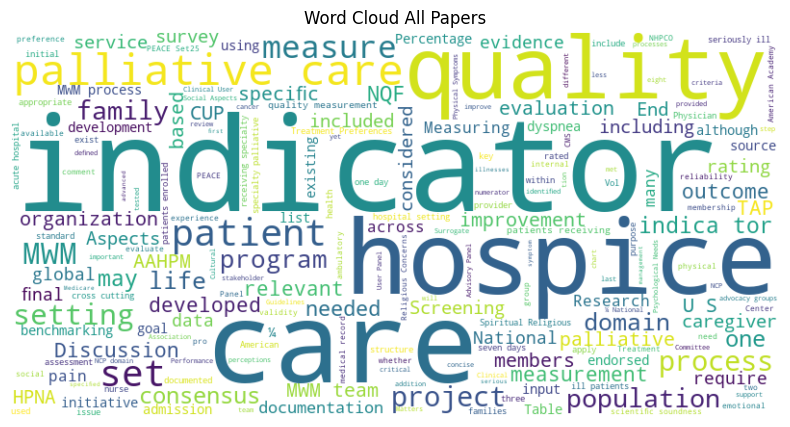

In [348]:
wc = WordCloud(width=800,height=400,background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud All Papers', fontsize=12)
plt.show()

## LDA model

In [349]:
from gensim import corpora

In [351]:
tokenized_sent = [preprocess(s) for s in sent]
#tokenized_sent = [s.lower().split() for s in sent]
dictionary = corpora.Dictionary(tokenized_sent)
#dictionary.filter_extremes(no_below=5, no_above=0.5) 
#no_below(int, optional): Keep tokens contained in at least no_below documents.
#no_above(float, optional): Keep tokens contained in no more than no_above documents (fraction of total corpus size)

corpus = [dictionary.doc2bow(text) for text in tokenized_sent]

#import pickle
#pickle.dump(corpus, open('corpus.pkl', 'wb'))
#dictionary.save('dictionary.gensim')

#ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=20)
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=10, random_state=100)
#ldamodel = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, random_state=100, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)
#ldamodel = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)

#ldamodel.save('model5.gensim')

topics = ldamodel.print_topics()
doc_lda = ldamodel[corpus]

topics = [i[-1] for i in topics]
print('\n'.join(['Topic {}:\t{}'.format(i+1, str(t)) for i, t in enumerate(topics)]))

Topic 1:	0.129*"process" + 0.040*"domain" + 0.037*"improve" + 0.037*"indica" + 0.029*"team" + 0.019*"rating" + 0.019*"assessment" + 0.017*"receiving" + 0.017*"documentation" + 0.016*"promise"
Topic 2:	0.329*"indicator" + 0.030*"service" + 0.023*"survey" + 0.021*"discussion" + 0.021*"hospital" + 0.020*"need" + 0.020*"apply" + 0.018*"available" + 0.018*"center" + 0.016*"critical"
Topic 3:	0.078*"project" + 0.052*"preference" + 0.034*"using" + 0.031*"member" + 0.031*"measure" + 0.026*"additional" + 0.026*"finally" + 0.026*"system" + 0.026*"area" + 0.022*"practice"
Topic 4:	0.048*"could" + 0.047*"program" + 0.045*"day" + 0.038*"developed" + 0.036*"improvement" + 0.035*"require" + 0.030*"tor" + 0.026*"considered" + 0.025*"performance" + 0.022*"source"
Topic 5:	0.062*"caregiver" + 0.036*"american" + 0.031*"included" + 0.031*"hpna" + 0.030*"important" + 0.029*"clinical" + 0.028*"emergency" + 0.024*"nurse" + 0.020*"provided" + 0.015*"focusing"
Topic 6:	0.207*"quality" + 0.081*"measurement" + 0

In [352]:
topics = ldamodel.show_topics(num_topics=10, num_words=15, formatted=False)

for i, topic in topics:
    print(f"Topic {i+1}:")
    print(" + ".join([f"{weight:.3f}*'{word}'" for word, weight in topic]))

Topic 1:
0.129*'process' + 0.040*'domain' + 0.037*'improve' + 0.037*'indica' + 0.029*'team' + 0.019*'rating' + 0.019*'assessment' + 0.017*'receiving' + 0.017*'documentation' + 0.016*'promise' + 0.016*'select' + 0.016*'number' + 0.015*'existing' + 0.015*'acute' + 0.014*'small'
Topic 2:
0.329*'indicator' + 0.030*'service' + 0.023*'survey' + 0.021*'discussion' + 0.021*'hospital' + 0.020*'apply' + 0.020*'need' + 0.018*'available' + 0.018*'center' + 0.016*'critical' + 0.015*'spiritual' + 0.014*'received' + 0.013*'symptom' + 0.013*'psychological' + 0.013*'qopi'
Topic 3:
0.078*'project' + 0.052*'preference' + 0.034*'using' + 0.031*'member' + 0.031*'measure' + 0.026*'additional' + 0.026*'finally' + 0.026*'system' + 0.026*'area' + 0.022*'practice' + 0.022*'oncology' + 0.018*'evaluate' + 0.018*'perception' + 0.018*'criterion' + 0.015*'endorsed'
Topic 4:
0.048*'could' + 0.047*'program' + 0.045*'day' + 0.038*'developed' + 0.036*'improvement' + 0.035*'require' + 0.030*'tor' + 0.026*'considered' + 0

In [354]:
# 
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=ldamodel, texts=tokenized_sent, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherence Score: {coherence_lda}')

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Coherence Score: 0.8149949409599667


In [335]:
#!pip install keybert

In [358]:
from keybert import KeyBERT
kw_model = KeyBERT()

for i, words in topics:
    topic_words = " ".join([w for w, _ in words])
    keywords = kw_model.extract_keywords(topic_words, keyphrase_ngram_range=(1, 2), stop_words='english', top_n=1)
    print(f"Topic {i+1} Label: {keywords[0][0]}")

Topic 1 Label: improve indica
Topic 2 Label: psychological qopi
Topic 3 Label: project preference
Topic 4 Label: tor considered
Topic 5 Label: hpna important
Topic 6 Label: medicare screening
Topic 7 Label: palliative evaluation
Topic 8 Label: setting population
Topic 9 Label: aahpm based
Topic 10 Label: assessing impact


### Plot

In [359]:
#!pip install pyLDAvis

In [362]:
import pyLDAvis.gensim_models
import pyLDAvis

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

In [361]:
pyLDAvis.save_html(vis, 'lda_vis.html')